# <center>ML Basics </center>
## <center>Inclass Project 1 - MA4144</center>

This project contains 12 tasks/questions to be completed.

After finishing project run the entire notebook once and **save the notebook as a pdf** (File menu -> Save and Export Notebook As -> PDF). You are **required to upload this PDF on moodle**.

Use this cell to use any include any imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Section 1

In this section we will analyse a dataset to look into its statistical propeties. For this we will use the DiabetesTrain.csv dataset. Each row corresponds to a single patient. The first 8 columns correspond to the features of the patients that may help predict risk of diabetes. The outcome column is a binary column represting the risk of diabetes, outcome 1 : high risk of diabetes and outcome 0 little to no risk of diabetes.

**Q1.** Read the dataset into a pandas dataframe called diabetesData. 

In [2]:
#read the dataset into a pandas dataframe 

diabetesData = pd.read_csv('DiabetesTrain.csv')
diabetesData.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,95,74,21,73,25.9,0.673,36,0
1,1,95,82,25,180,35.0,0.233,43,1
2,1,90,68,8,0,24.5,1.138,36,0
3,7,195,70,33,145,25.1,0.163,55,1
4,0,180,66,39,0,42.0,1.893,25,1


**Q2.** Let us define the following events.

A = Patient has BMI less than 25

B = Patient has Glucose level greater than 100

C = Patient has had more than 2 pregnancies

D = Patient has high risk of diabetes

Based on the above definitions determine the following probabilities. Pandas dataframe inbuilt functions such as count, group by, would be useful for this task.

In [3]:
# Compute the probability of diabetes

# P(A) = probability of patient having BMI less than 25
# P(A) = number of patients with BMI less than 25 / total number of patients
P_A = diabetesData[diabetesData['BMI'] < 25].shape[0] / diabetesData.shape[0]

# P(B) = probability of patient having Glucose level greater than 100
# P(B) = number of patients with Glucose level greater than 100 / total number of patients
P_B = diabetesData[diabetesData['Glucose'] > 100].shape[0] / diabetesData.shape[0]


# P(C) = Patient has had more than 2 pregnancies
# P(C) = number of patients with pregnancies > 2 / total number of patients
P_C = diabetesData[diabetesData['Pregnancies'] > 2].shape[0] / diabetesData.shape[0]


# P(D) = probability of patient has high risk of diabetes
# P(D) = number of patients with high risk of diabetes / total number of patients
P_D = diabetesData[diabetesData['Outcome'] == 1].shape[0] / diabetesData.shape[0]


# P(A, D) = probability of patient having BMI less than 25 and has high risk of diabetes
# P(A, D) = number of patients with BMI less than 25 and has high risk of diabetes / total number of patients
P_A_D = diabetesData[(diabetesData['BMI'] < 25) & (diabetesData['Outcome'] == 1)].shape[0] / diabetesData.shape[0]


# P(B, D) = probability of patient having Glucose level greater than 100 and has high risk of diabetes
# P(B, D) = number of patients with Glucose level greater than 100 and has high risk of diabetes / total number of patients
P_B_D = diabetesData[(diabetesData['Glucose'] > 100) & (diabetesData['Outcome'] == 1)].shape[0] / diabetesData.shape[0]


# P(C, D) = probability of patient having more than 2 pregnancies and has high risk of diabetes
# P(C, D) = number of patients with more than 2 pregnancies and has high risk of diabetes / total number of patients
P_C_D = diabetesData[(diabetesData['Pregnancies'] > 2) & (diabetesData['Outcome'] == 1)].shape[0] / diabetesData.shape[0]


#Indicate which one out of A, B, C contributes the most towards high risk of diabetes.
#Assign one of 'A', 'B', 'C' to the following variable Q2, indicating your answer.
#Hint: Compute the necessary conditional probabilities and then compare.

# P(D|A) = P(A, D) / P(A)
P_D_A = P_A_D / P_A

# P(D|B) = P(B, D) / P(B)
P_D_B = P_B_D / P_B

# P(D|C) = P(C, D) / P(C)
P_D_C = P_C_D / P_C

print("P_D_A: " , P_D_A)
print("P_D_B: " , P_D_B)
print("P_D_C: " , P_D_C)

Q2 = 'B'

P_D_A:  0.05084745762711865
P_D_B:  0.48299319727891155
P_D_C:  0.46976744186046504


**Q3.** Now we will compute the covariance and correlation matrices from scratch. For this do not use any inbuilt functions. Follow the steps outlined below. Each step is graded.

**Step1:** Convert the diabetesData dataframe into a 2-dimensional numpy array with the same number of rows and columns as in the dataframe. Name it diabetesX.

In [4]:
# compute the covariance and correlation matrices from scratch

In [5]:
# convert the dataframe in to 2D numpy array
diabetesX = diabetesData[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']].values
print(diabetesX)

[[  1.     95.     74.    ...   0.673  36.      0.   ]
 [  1.     95.     82.    ...   0.233  43.      1.   ]
 [  1.     90.     68.    ...   1.138  36.      0.   ]
 ...
 [  4.    146.     78.    ...   0.52   67.      1.   ]
 [ 15.    136.     70.    ...   0.153  43.      1.   ]
 [ 10.    101.     86.    ...   1.136  38.      1.   ]]


**Step2:** In diabetesX; center every column, by subtracting each column by the column mean and reassign it to diabetesX.

In [6]:
# center the data by substracting the each column by its mean and reassing the centered data to diabetesX
# use np.mean() with appropriate axis
diabetesX = diabetesX - np.mean(diabetesX, axis=0)
print(diabetesX)
print(diabetesX.shape)


#After centering
#diabetesX = None

[[-2.84711779e+00 -2.69598997e+01  5.17543860e+00 ...  1.78518797e-01
   3.07017544e+00 -3.78446115e-01]
 [-2.84711779e+00 -2.69598997e+01  1.31754386e+01 ... -2.61481203e-01
   1.00701754e+01  6.21553885e-01]
 [-2.84711779e+00 -3.19598997e+01 -8.24561404e-01 ...  6.43518797e-01
   3.07017544e+00 -3.78446115e-01]
 ...
 [ 1.52882206e-01  2.40401003e+01  9.17543860e+00 ...  2.55187970e-02
   3.40701754e+01  6.21553885e-01]
 [ 1.11528822e+01  1.40401003e+01  1.17543860e+00 ... -3.41481203e-01
   1.00701754e+01  6.21553885e-01]
 [ 6.15288221e+00 -2.09598997e+01  1.71754386e+01 ...  6.41518797e-01
   5.07017544e+00  6.21553885e-01]]
(399, 9)


**Step3:** Compute the covariance matrix. Use, matrix operations in numpy such as matrix multiplication, matrix transpose and don't forget to average. Assign it to the variable cov.

In [7]:
# compute the covariance matrix of the centered data
# use np.dot() and np.transpose() functions and by averaging over the number of samples
cov = (diabetesX.T @ diabetesX) / diabetesX.shape[0]
print(cov)


[[ 1.18437950e+01  2.33096589e+01  7.77518357e+00 -1.81496976e+00
  -1.62017764e+01  2.08686754e+00 -9.69389640e-02  2.09516774e+01
   4.06228604e-01]
 [ 2.33096589e+01  1.04421393e+03  4.81257969e+01  1.21142706e+01
   1.37671420e+03  5.92543803e+01  1.28917218e+00  1.19766610e+02
   7.12795774e+00]
 [ 7.77518357e+00  4.81257969e+01  3.76500550e+02  6.39711120e+01
   2.18620543e+02  3.35492547e+01 -1.68399288e-01  3.78874379e+01
   2.41832652e-01]
 [-1.81496976e+00  1.21142706e+01  6.39711120e+01  2.45721748e+02
   8.47700171e+02  4.78454049e+01  8.22180131e-01 -1.91007783e+01
   4.95505681e-01]
 [-1.62017764e+01  1.37671420e+03  2.18620543e+02  8.47700171e+02
   1.51496065e+04  1.87034995e+02  6.20455494e+00  4.34146331e+01
   8.43723343e+00]
 [ 2.08686754e+00  5.92543803e+01  3.35492547e+01  4.78454049e+01
   1.87034995e+02  6.79717825e+01  3.34248439e-01  5.71433848e+00
   1.23713042e+00]
 [-9.69389640e-02  1.28917218e+00 -1.68399288e-01  8.22180131e-01
   6.20455494e+00  3.3424843

**Step4:** Compute the matrix varmat, whose $(i, j)$ entry is $\sqrt{var(i)var(j)}$, where $var(k)$ is the variance of the $k$th column of the diabetesX matrix. The varinces can be extracted from the covariance matrix itself appropriately and varmat can be computed by appropriate matrix multiplication of a column matrix and a row matrix.

In [8]:
# compute the varmat matrix

var = np.diag(cov)
varmat = np.sqrt(np.outer(var, var))

print(varmat)


[[1.18437950e+01 1.11209063e+02 6.67772065e+01 5.39469925e+01
  4.23590407e+02 2.83732947e+01 1.18132415e+00 3.92699433e+01
  1.66911730e+00]
 [1.11209063e+02 1.04421393e+03 6.27014449e+02 5.06543258e+02
  3.97736472e+03 2.66415244e+02 1.10922177e+01 3.68730936e+02
  1.56724235e+01]
 [6.67772065e+01 6.27014449e+02 3.76500550e+02 3.04161755e+02
  2.38827033e+03 1.59973165e+02 6.66049411e+00 2.21410209e+02
  9.41074977e+00]
 [5.39469925e+01 5.06543258e+02 3.04161755e+02 2.45721748e+02
  1.92940089e+03 1.29236780e+02 5.38078253e+00 1.78869640e+02
  7.60261882e+00]
 [4.23590407e+02 3.97736472e+03 2.38827033e+03 1.92940089e+03
  1.51496065e+04 1.01476389e+03 4.22497669e+01 1.40447984e+03
  5.96955687e+01]
 [2.83732947e+01 2.66415244e+02 1.59973165e+02 1.29236780e+02
  1.01476389e+03 6.79717825e+01 2.83001001e+00 9.40760694e+01
  3.99857962e+00]
 [1.18132415e+00 1.10922177e+01 6.66049411e+00 5.38078253e+00
  4.22497669e+01 2.83001001e+00 1.17827668e-01 3.91686385e+00
  1.66481147e-01]
 [3.92

**Step5:** Use the cov matrix and varmat matrix appropriately to compute the correlational matrix corr. And then use seaborn (sns imported above) to plot an annotated heatmap of the correlation matrix.

[[ 1.          0.20960215  0.11643469 -0.03364358 -0.03824869  0.07355041
  -0.08205958  0.53352961  0.2433793 ]
 [ 0.20960215  1.          0.07675389  0.02391557  0.34613728  0.22241363
   0.11622312  0.3248076   0.4548089 ]
 [ 0.11643469  0.07675389  1.          0.21031938  0.09153928  0.20971802
  -0.0252833   0.17111875  0.02569749]
 [-0.03364358  0.02391557  0.21031938  1.          0.43935927  0.37021508
   0.15279936 -0.10678603  0.06517566]
 [-0.03824869  0.34613728  0.09153928  0.43935927  1.          0.18431381
   0.14685418  0.03091154  0.14133768]
 [ 0.07355041  0.22241363  0.20971802  0.37021508  0.18431381  1.
   0.11810857  0.06074168  0.30939247]
 [-0.08205958  0.11622312 -0.0252833   0.15279936  0.14685418  0.11810857
   1.          0.03800831  0.15375518]
 [ 0.53352961  0.3248076   0.17111875 -0.10678603  0.03091154  0.06074168
   0.03800831  1.          0.2366668 ]
 [ 0.2433793   0.4548089   0.02569749  0.06517566  0.14133768  0.30939247
   0.15375518  0.2366668   1. 

<Axes: >

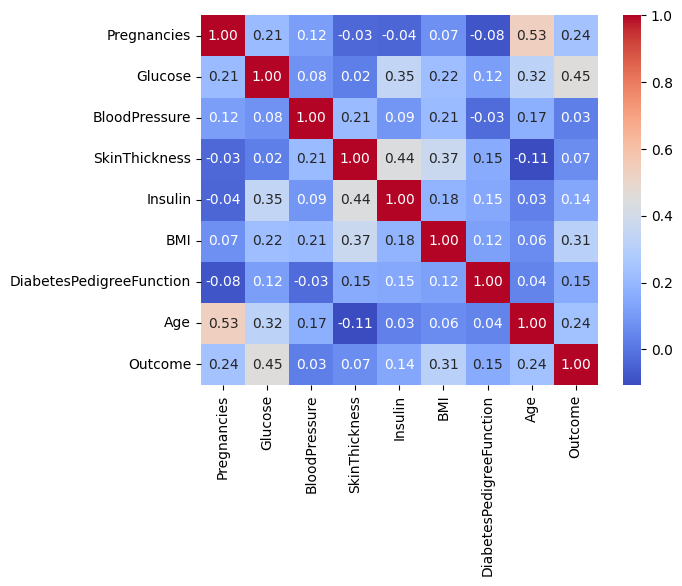

In [9]:
#claculate the corelation matrix
corr = cov / varmat
print(corr)
#Plot the heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', xticklabels=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'], yticklabels=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'])


From the heatmap read the following correlations. Also, answer the question below.

In [10]:
#Corr(BMI, Outcome)
Corr1 = 0.31

#Corr(Glucose, Outcome)
Corr2 = 0.45

#Corr(Pregnancies, Outcome)
Corr3 = 0.24

#Out of the 8 features, which two features are the most correlated. Fill in the list variable bestcorr
bestcorr = ['Age', 'Pregnancies']

## Section 2

In this section we will train a logistic regression model on the diabetes dataset to predict the risk of diabetes given patient data. We will then use it to perform predictions on previously unseen (test) data.

**Q4.** Preprocess Data.
 
Implement a function normalizeData that normalizes each column of a data array. Recall that a column $x$ is normalized by $z = \frac{x - mean(x)}{std(x)}$. The function should return the normalized data matrix and the mean and standard deviations of each column (we'll need these to normalize the test data later).

In [11]:
def normalizeData(X, mean = np.array([]), std = np.array([])):

    # Implement such that if the mean and std are empty arrays then mean and std is calculated here, else use the mean and std passed in as parameters
    mean = np.mean(X, axis=0) if mean.size == 0 else mean
    std = np.std(X, axis=0) if std.size == 0 else std
    
    
    normalized_X = (X - mean) / std

    return normalized_X, mean, std

**Q5.** Sigmoid function and it's derivative.

1. Implement the sigmoid function. Given a numpy array, compute the sigmoid values of the array. It should return an array of sigmoid values. If you see any overflow errors/warnings popping up, that is because the numbers coming out of the exponential function $e^{-t}$ in the sigmoid function are too large to handle. In that case, please clip the input between some large enough negative and positive value (look into numpy.clip).
2. Implement the derivative of the sigmoid function. Recall that if, $p = \sigma(t)$, then $p' = p(1-p)$. The function should take in an array of $p$ values and then return the array of $p'$. 


In [12]:
#Sigmoid function
#t is a numpy array, claculte the sigmoid of each element of t

def sigmoid(t):

    #clip when the value is too large or too small of exp(-t)
    t = np.clip(t, -500, 500)
    sig = 1 / (1 + np.exp(-t))
    
    return sig

In [13]:
#Derivative of sigmoid function
def derivSigmoid(p):

    deriv_p = p * (1 - p)

    return deriv_p

**Q6.** Compute sigmoid probabilities.

Recall that $p = P(y = 1 | x) = \sigma(x^T \omega + b)$, where $\omega = \begin{bmatrix} \omega_1 \\ \omega_2 \\ \vdots \\ \omega_d \end{bmatrix}$ are the weights and $b$ is the bias term. Implement a function sigProg to calculate those probabilities, given a matrix $X$ of data, weight vector $\omega$ and bias $b$. It is possible to compute the array of probabilities for the entire dataset at once without a single for-loop, by just using matrix mutltiplications, which is the rightway to achieve maximum efficiency. You are supposed to use the above implemented sigmoid function. This should return an array of probabilities.

In [14]:
def sigProg(X, w, b):

    # calculte the liner transformation of X, w and b
    z = np.dot(X, w) + b
    # calculate the sigmoid of the linear transformation
    p = sigmoid(z)
    
    return p

**Q7.** Compute loss gradient.

Recall that the loss function for logistic regression is given by,

$L(\omega, b) = \frac{1}{N} \sum\limits_{i = 1}^{N} (p_i - y_i)^2 + \lambda reg(\omega)$ where is the sigmoid probability $p_i = P(y_i = 1 | x_i)$ for the data point $(x_i, y_i)$ and $reg(\omega)$ is the regularization term - it could be either ridge $reg(\omega) = ||\omega||_2^2$ or lasso $reg(\omega) = ||\omega||_1$ or no regularization at all. $\lambda \geq 0$ is the regularization constant. $N$ is the number of datapoints.

Then, the gradient of the loss function with respect to $\omega$ and the derivative with respect to $b$ is given by,

$\nabla_{\omega}L = \frac{1}{N} \sum\limits_{i = 1}^{N} (p_i - y_i) p'_i x_i \ + \ \lambda reg'(\omega)$

$\frac{\partial L}{\partial b} = \frac{1}{N} \sum\limits_{i = 1}^{N} (p_i - y_i) p'_i$

Here,

$reg'(\omega) = \begin{cases} \omega \; &\textrm{ if ridge } \\ sign(\omega) \; &\textrm{ if lasso } \end{cases}$

Implement a function named gradient to compute the gradient and derivative of the loss function, given data matrix $X$, output vector $y$, weight vector $\omega$ and bias $b$. The function should also be able to take in other parameters such as reg (= "none", "ridge" or "lasso") and lambda. It should return the gradient and derivative. All these computations can be done without a single for loop, only by using numpy builtins for matrix computations, which is the most desired way to achieve efficiency 

In [15]:
def gradient(X, y, w, b, reg = "none", Lambda = 0.1):

    # loss function with regularization
    # reg = "l1" or "l2" or "none"
    # Lambda is the regularization strength

    # number of samples
    N = X.shape[0]

    # calculate the sigmoid of the linear transformation
    p = sigProg(X, w, b)

    # derivative of the sigmoid function
    p_prime = derivSigmoid(p)

    
    # Compute the difference term
    diff = (p - y) * p_prime # Shape (N,)

    # Compute gradient w.r.t weights
    grad_w = (1 / N) * np.dot(X.T, diff)  # Shape (d,)

    # Compute gradient w.r.t bias
    deriv_b = (1 / N) * np.sum(diff)  # Scalar

    # Apply regularization
    if reg == "ridge":  # Ridge regularization (L2)
        reg_term = w  # ∇L2 = w
    elif reg == "lasso":  # Lasso regularization (L1)
        reg_term = np.sign(w)  # ∇L1 = sign(w)
    else:  # No regularization
        reg_term = np.zeros_like(w)

    # Update weights with regularization
    grad_w += Lambda * reg_term

    

    return grad_w, deriv_b

**Q8.** Gradient descent algorithm.

Recall the following update rule for gradient descent,

$\omega \leftarrow \omega - \eta \nabla_{\omega} L$

$b \leftarrow b - \eta \frac{\partial L}{\partial b}$

where $\eta > 0$ is the learning rate.

Implement the gradient descent algorithm in a function grad_descent given the gradient vector $\nabla_{\omega} L$ (grad_w), derivative $\frac{\partial L}{\partial b}$ (deriv_b), weights $\omega$ and bias $b$. Also should be able to accept the learning rate $\eta$ (eta). The function should return the updated $\omega$ and $b$.

In [16]:
def grad_descent(grad_w, deriv_b, w, b, eta = 0.01):

    # update the weights and bias
    w = w - eta * grad_w
    b = b - eta * deriv_b

    return w, b

**Q9.** Train model

Implement the function train. It should initialize $\omega$ and $b$ to some random values or zeros. Then interatively update the $\omega$ and $b$ using gradient descent, untill the number of interations reach the maximum number of interations specified as max_iter. The function will take in training data $(X, y)$, regularization details (type of reg, and $\lambda$), and learning rate $\eta$ (eta). Finally, it should return the trained $\omega$ and $b$.

In [23]:
def train(X, y, reg = 'none', Lambda = 0.1, eta = 0.01, max_iter = 1000):

    #initialize the  w and b with zeros
    #update the weights and bias using gradient descent
    #use the gradient function to calculate the gradient

    w = np.zeros(X.shape[1])
    b = 0
    loss_values = []   # Collect loss function values
    w_norms = []       # Collect L2-norm of w values

    for i in range(max_iter):
        grad_w, deriv_b = gradient(X, y, w, b, reg, Lambda)
        w, b = grad_descent(grad_w, deriv_b, w, b, eta)

        # Compute loss and append to loss_values
        # Compute ||w||2 norm and append to w_norms
        loss = -np.mean(y * np.log(sigProg(X, w, b)) + (1 - y) * np.log(1 - sigProg(X, w, b)))
        loss_values.append(loss)
        w_norms.append(np.linalg.norm(w))
        


    return w, b, loss_values, w_norms

**Q10.** Predict using the model

Implement a function predict to output predictions for given input data $X$, trained weights $\omega$ and $b$. Make sure that the output should only consist of $1$'s and $0$'s. The function should return the predictions $\hat{y}$ (yhat).

In [18]:
def predict(X, w, b):

    #predict the output of the model
    #use the sigmoid function to calculate the probability
    yhat = sigProg(X, w, b)

    #output normalization
    yhat[yhat > 0.5] = 1
    yhat[yhat <= 0.5] = 0               

    return yhat

    

**Q11.** Use the above logistic regression algorithm on the diabetes dataset. Train a model ($\omega$, $b$). Then evaluate it. Use classification error to evaluate it.

Start by separating the diabetesData into input (features) and output (Outcome), and store them in numpy matrices X_train and y_train respectively, and then normalizing the input features.

Some tips to improve accuracy.

1. Use cross validation to find the best hyperparameters $\eta$, $\lambda$, and regularization type.
2. Plot the loss function versus iterations while training (you can do this by additionally collecting the loss values within the train function), having a smooth decreasing graph will indicate proper training.
3. As above plot the $\ell_2$-norm of the $\omega$ vector versus iterations, we expect smooth decreasing curve for this as well.

More tips and additional clarifications in class.

In [27]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

#separate training data set as input features and target labels
X_train = diabetesData[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].values
y_train = diabetesData['Outcome'].values

#normalize the data
X_train, mean, std = normalizeData(X_train)

# print(X_train, y_train)

# Define hyperparameter search space
eta_values = np.array([0.001, 0.01, 0.1])  # Learning rates
Lambda_values = np.array([0.01, 0.1, 1.0])  # Regularization strengths
reg_types = np.array(["none", "ridge", "lasso"])  # Regularization types

# setup cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Generate all combinations of hyperparameters
hyperparams = np.array(np.meshgrid(eta_values, Lambda_values, reg_types)).T.reshape(-1, 3)

# function to evaluate the hyperparameters

def classification_error(y_true, y_pred):

    # calculate the classification error
    error = np.mean(y_true != y_pred)

    return error


#train the model
#w, b = train(X_train, y_train, reg = 'none', Lambda = 0.1, eta = 0.01, max_iter = 1000)

# use k fold cross validation for finding the best hyperparameters
def evaluate_hyperparams(hyperparam_set):
    eta, Lambda, reg = hyperparam_set
    eta, Lambda = float(eta), float(Lambda)

    train_errors = []

    # Iterate over K-Fold splits
    for train_idx, val_idx in kf.split(X_train):
        X_train_fold, y_train_fold = X_train[train_idx], y_train[train_idx]
        X_val_fold, y_val_fold = X_train[val_idx], y_train[val_idx]

        # Train model and compute loss
        w, b, _, _ = train(X_train_fold, y_train_fold, reg=reg, Lambda=Lambda, eta=eta, max_iter=1000)

        # Vectorized predictions
        y_val_pred = predict(X_val_fold, w, b)

        # Compute classification error
        train_errors.append(classification_error(y_val_fold, y_val_pred))

    return np.mean(train_errors)  # Return mean error across folds

# Compute validation errors
validation_errors = np.array([evaluate_hyperparams(hp) for hp in hyperparams])

# Find best hyperparameters
best_idx = np.argmin(validation_errors)
best_eta, best_Lambda, best_reg = hyperparams[best_idx]
best_eta, best_Lambda = float(best_eta), float(best_Lambda)

print(f"Best Hyperparameters: eta={best_eta}, Lambda={best_Lambda}, reg={best_reg}")

# Train model with best hyperparameters
w, b, loss_values, w_norms = train(X_train, y_train, reg=best_reg, Lambda=best_Lambda, eta=best_eta, max_iter=1000)




Best Hyperparameters: eta=0.1, Lambda=0.01, reg=ridge


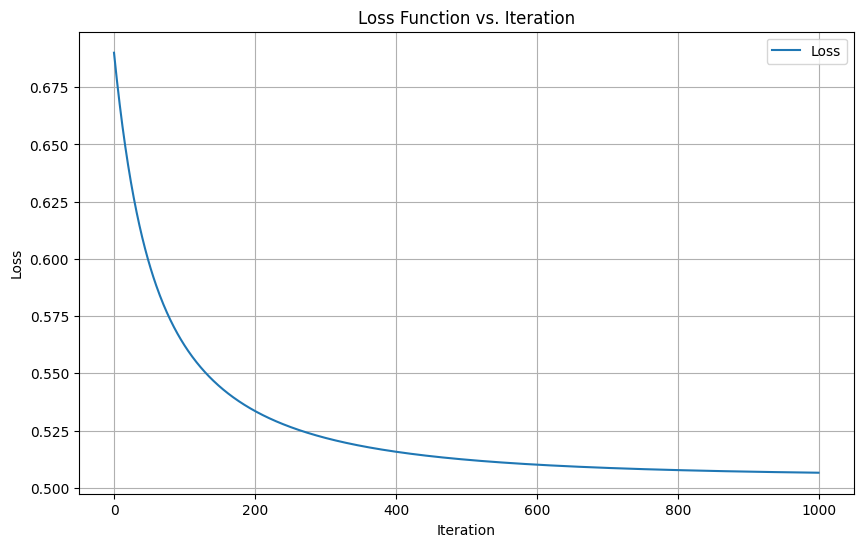

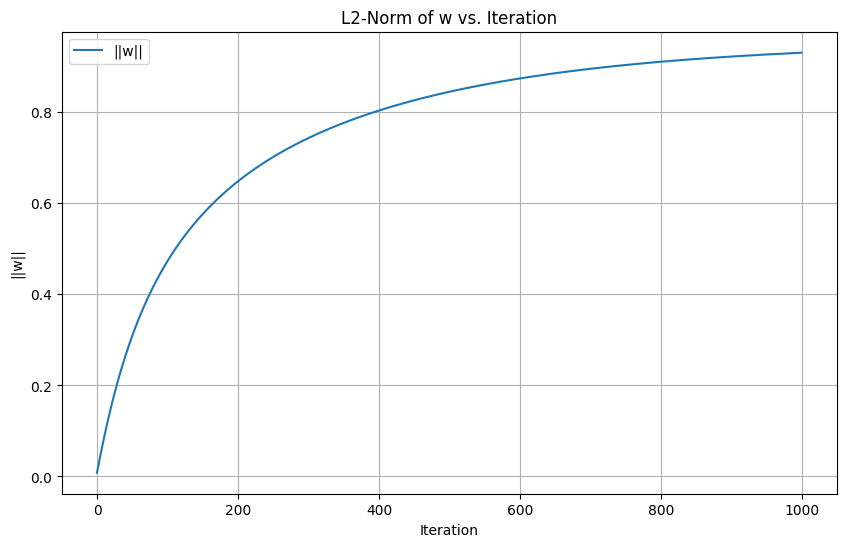

In [28]:
# Plot the loss function vs iteration
plt.figure(figsize=(10, 6))
plt.title("Loss Function vs. Iteration")
plt.plot(loss_values, label='Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Plot the L2-norm of w vs iteration
plt.figure(figsize=(10, 6))
plt.title("L2-Norm of w vs. Iteration")
plt.plot(w_norms, label='||w||')
plt.xlabel('Iteration')
plt.ylabel('||w||')
plt.legend()
plt.grid()
plt.show()


**Q12.** Testing on previously unseen test data - final part.

1. Load the DiabetesTest.csv file.
2. Use your best trained model to predict the 'Outcome' for this test data, assign your predictions to y_test_pred, this should be an array of $0$'s and $1$'s.
3. This will be graded on the level of accuracy of your predictions.
4. Remember to properly normalize your data before using them in the model. For normalization use the mean and standard deviation of the training data not the test data.


In [32]:
#testing the model on unseen data (DiabetesTest.csv)
diabetesTest = pd.read_csv('DiabetesTest.csv')

diabetesTest.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,89,66,23,94,28.1,0.167,21
1,3,78,50,32,88,31.0,0.248,26
2,7,147,76,0,0,39.4,0.257,43
3,1,97,66,15,140,23.2,0.487,22
4,4,111,72,47,207,37.1,1.390,56


In [33]:
#test the model on unseen data
X_test = diabetesTest[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].values
print("best eta: ", best_eta)
print("best Lambda: ", best_Lambda)
print("best reg: ", best_reg)
print("w: ", w)
print("b: ", b)

y_test_pred = predict(normalizeData(X_test, mean, std)[0], w, b)

print(y_test_pred)

best eta:  0.1
best Lambda:  0.01
best reg:  ridge
w:  [ 0.27208321  0.70754267 -0.1050738  -0.03051267  0.04262126  0.45506755
  0.25690788  0.0679097 ]
b:  -0.5497074432970875
[0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1.
 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 1.]
